In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.misc

## Generate ADF image
ADF image is used as s reference to indicate where each atomic site is

In [6]:
# path to raw data, denoised data, and ground truth
path ='D:/2020/TensorSVD/ManuscriptRelated/SimulationData/'
raw_data = sio.loadmat(path + 'DenoiseInput_fullsize/STO/Simulation_noisy_STO_slice_5_1000FPS_fullsize.mat')
raw_data = raw_data['datacube']
truth_data = np.load(path + 'DenoiseInput_fullsize/STO/Simulation_truth_STO_slice_5_1000FPS_fullsize.npy')
denoised_data = sio.loadmat(path + 'DenoiseOutput_fullsize/STO/Simulation_tensor_STO_slice_5_1000FPS_fullsize.mat')
denoised_data = denoised_data['est_HOOI']

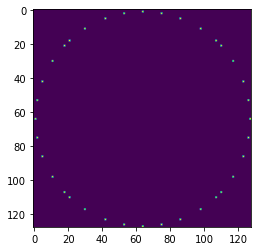

In [7]:
# A circular mask with less points can be generated by using a smaller gap between two radii
# Has to construct ADF image from very few k-space points to see the different after denoising
# If integrate over a large annular area in k-space, then the ADF from raw data will be noiseless as well
circular_mask = create_circular_mask(128, 128, center=(64,64), radius=63) & \
~create_circular_mask(128, 128, center=(64,64), radius=62.95)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_truth = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[:,:,i*128+j]
            ADF_truth = ADF_truth + truth_data[:,:,i*128+j]

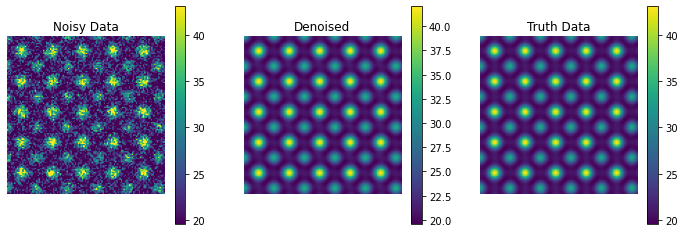

In [8]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))
clim_low = np.amin(ADF_truth)
clim_high = np.amax(ADF_truth)

plt.subplot(132)
plt.imshow(ADF_denoised)
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(131)
plt.imshow(ADF_noisy,clim=[clim_low,clim_high])
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(133)
plt.imshow(ADF_truth,clim=[clim_low,clim_high])
plt.title('Truth Data')
plt.axis('off')
plt.colorbar()

## Symmetry STEM
Symmetry STEM (published by Joanne Etheridge, arXiv:1903.04780) is used to show how tensor SVD could improve the quality of materials science properties extracted from 4D STEM data.

Symmetry STEM for 90 degree rotation and 180 degree roation is calculated using Matlab's built in functions 'imrotate' and 'normxcorr2' (using Matlab to calculate the symmetry STEM signal is much easier than using Python functions). All different frame rates are calculated.

In [41]:
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/STO/'
symmetry_STEM = sio.loadmat(path + 'STO_SymmetrySTEM_10000FPS_180deg.mat')
symmetry_raw = symmetry_STEM['symmetry_noisy']
symmetry_denoised = symmetry_STEM['symmetry_denoised']
symmetry_truth = symmetry_STEM['symmetry_truth']

Text(160.5, 40.5, 'Normalized Intensity')

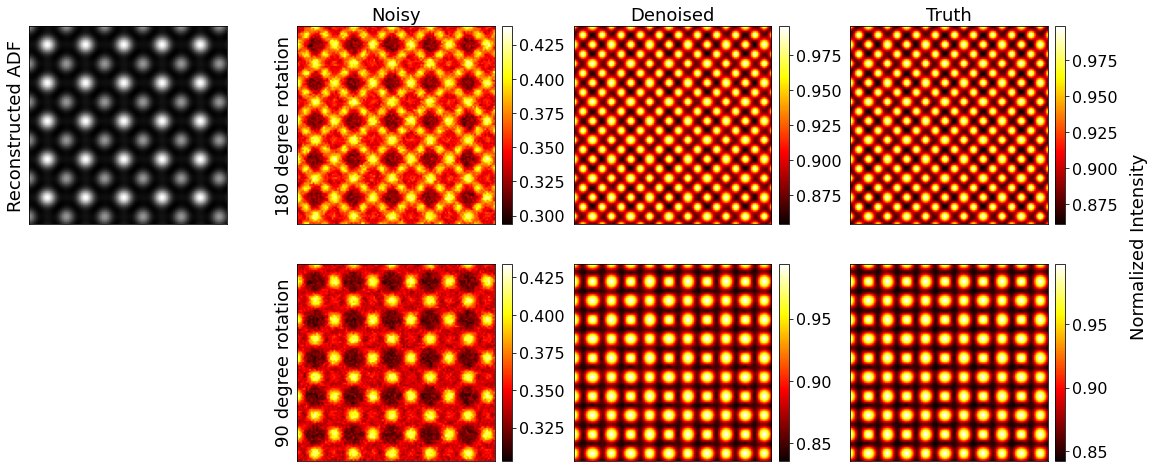

In [59]:
fig = plt.figure(figsize=(19,8))

# 
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/STO/'
symmetry_STEM = sio.loadmat(path + 'STO_SymmetrySTEM_10000FPS_180deg.mat')
symmetry_raw = symmetry_STEM['symmetry_noisy']
symmetry_denoised = symmetry_STEM['symmetry_denoised']
symmetry_truth = symmetry_STEM['symmetry_truth']


ax = fig.add_subplot(241)
plt.imshow(ADF_truth,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.ylabel('Reconstructed ADF', fontsize=18)

clim_min = np.amin(symmetry_raw)
clim_max = 1

ax = fig.add_subplot(242)
im = plt.imshow(symmetry_raw,cmap='hot')
plt.ylabel('180 degree rotation', fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=16)


ax = fig.add_subplot(243)
im = plt.imshow(symmetry_denoised,cmap='hot')
plt.xticks([])
plt.yticks([])
plt.title('Denoised',fontsize=18)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=16)

ax = fig.add_subplot(244)
im = plt.imshow(symmetry_truth,cmap='hot')
plt.xticks([])
plt.yticks([])
plt.title('Truth',fontsize=18)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=16)

# Plot the second half for 90 degree rotation
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseOutput_fullsize/STO/'
symmetry_STEM = sio.loadmat(path + 'STO_SymmetrySTEM_10000FPS_90deg.mat')
symmetry_raw = symmetry_STEM['symmetry_noisy']
symmetry_denoised = symmetry_STEM['symmetry_denoised']
symmetry_truth = symmetry_STEM['symmetry_truth']

ax = fig.add_subplot(246)
im = plt.imshow(symmetry_raw,cmap='hot')
plt.ylabel('90 degree rotation', fontsize=18)
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=16)

ax = fig.add_subplot(247)
im = plt.imshow(symmetry_denoised,cmap='hot')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=16)

ax = fig.add_subplot(248)
im = plt.imshow(symmetry_truth,cmap='hot')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im,cax=cax)
cbar.ax.tick_params(labelsize=16)
# cbar.set_label('Normalized Intensity',fontsize=18)

ax.text(160.5, 40.5, 'Normalized Intensity', rotation=90, fontsize=18)

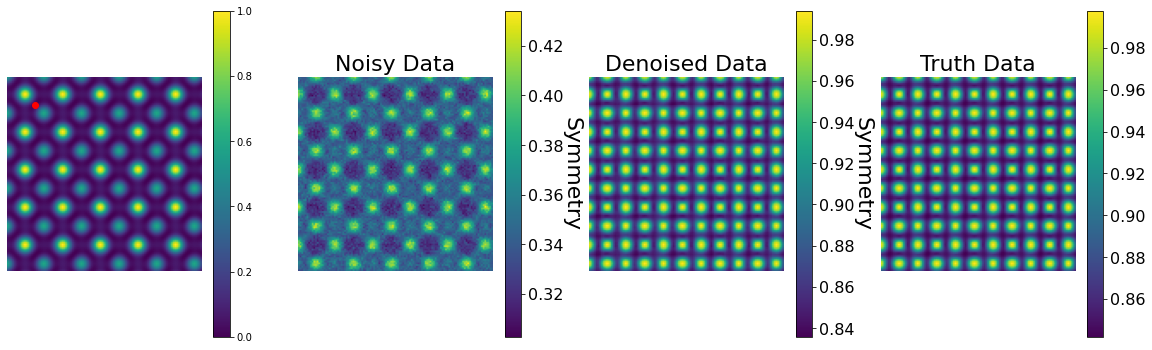

In [48]:
plt.figure(figsize=(20,6))

rx = 16
ry = 16

plt.subplot(141)
plt.imshow(ADF_truth)
plt.scatter(rx,ry,c='r')
plt.axis('off')
plt.colorbar()

plt.subplot(142)
plt.imshow(symmetry_raw)
plt.axis('off')
plt.title('Noisy Data', fontsize = 22)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Symmetry',rotation=270,fontsize=22,labelpad=18)

plt.subplot(143)
plt.imshow(symmetry_denoised)
plt.axis('off')
plt.title('Denoised Data', fontsize = 22)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Symmetry',rotation=270,fontsize=22,labelpad=18)

plt.subplot(144)
plt.imshow(symmetry_truth)
plt.axis('off')
plt.title('Truth Data', fontsize = 22)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)


In [5]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask